##### I. Phép biến đổi màu
###### 1. Phép biến đổi tuyến tính
###### 2. Phép biến đổi phi tuyến
###### 3. Phép biến đổi dựa trên phân bố xác suất
######   - Cân bằng lược đồ xám (Histogram Equalization)
######   - Đặc tả lược đồ xám (Histogram Specification)

##### II. Phép biến hình học
###### 1. Phép biến đổi vị trí điểm ảnh
######  - Dạng song tuyến tính
######  - Phép biến đổi affine
###### 2. Phép nội suy giá trị màu của điểm ảnh

##### III. Làm trơn ảnh dựa trên miền không gian
###### 1. Toán tử trung bình
###### 2. Toán tử Gaussian
###### 3. Toán tử trung vị

##### IV. Phát hiện biên cạnh dựa trên miền không gian
###### 1. Toán tử Gradient
###### 2. Toán tử Laplace
###### 3. Toán tử Laplace of Gaussian
###### 4. Phương pháp Canny

##### III. Làm trơn ảnh dựa trên miền không gian
###### 1. Toán tử trung bình
###### 2. Toán tử Gaussian
###### 3. Toán tử trung vị

In [1]:
# Median filter cho kết quả tốt khi thực hiện trên ảnh salt and pepper
import numpy as np
from scipy import signal
import cv2
from matplotlib import pyplot as plt
import random 
%matplotlib inline

Phép tích chập dùng cho các bộ lọc tuyến tính

In [2]:
def convolute(image, kernel):
  # Lật ma trận mặt nạ
  r,c = kernel.shape
  flipped_kernel = np.zeros((r,c),np.float32)
  h = 0
  if r==c and r%2 :
    h = int((r-1)/2)
    for i in range(-h,h+1):
     for j in range(-h,h+1):
      flipped_kernel[i+h,j+h]=kernel[-i+h,-j+h]
  # Thêm padding cho ảnh đầu vào
  m,n = image.shape
  padded_image = np.zeros((m+2*h,n+2*h),np.float32)
  padded_image[h:-h,h:-h] = image
  # Tạo ảnh đầu ra
  output = np.zeros((m,n),np.float32)
  for i in range(m):
   for j in range(n):
    output[i,j]=(flipped_kernel * padded_image[i: i+r, j: j+r]).sum()
  return output

In [3]:
def cross_correlate(image, kernel):
  r, c = kernel.shape
  h=0
  if r == c and r%2 :
    h = int((r-1)/2)
  # Thêm padding cho ảnh đầu vào
  m,n = image.shape
  padded_image = np.zeros((m+2*h,n+2*h),int)
  padded_image[h:-h,h:-h] = image
  # Tạo ảnh đầu ra
  output = np.zeros((m,n),np.float32)
  for i in range(m):
   for j in range(n):
    output[i,j]=(kernel * padded_image[i: i+r, j: j+r]).sum()
  return output

In [4]:
# Thêm nhiễu muối tiêu vào ảnh
# https://www.geeksforgeeks.org/add-a-salt-and-pepper-noise-to-an-image-with-python/
def add_noise(img): 
    # Getting the dimensions of the image 
  row,col = img.shape     
    # Randomly pick some pixels in the 
    # image for coloring them white 
    # Pick a random number between 300 and 10000 
  number_of_pixels = random.randint(300, 10000) 
  for i in range(number_of_pixels): 
        # Pick a random y coordinate 
    y_coord=random.randint(0, row - 1) 
        # Pick a random x coordinate 
    x_coord=random.randint(0, col - 1) 
    img[y_coord][x_coord] = 255
  number_of_pixels = random.randint(300 , 10000) 
  for i in range(number_of_pixels): 
   # Pick a random y coordinate 
    y_coord=random.randint(0, row - 1) 
   # Pick a random x coordinate 
    x_coord=random.randint(0, col - 1) 
   # Color that pixel to black 
    img[y_coord][x_coord] = 0
  return img

Lọc trung bình
- Là phép lọc tuyến tính, làm mịn, làm mờ hình ảnh, lọc nhiễu

In [5]:
# Xây dựng bộ lọc trung bình
def meanFilter(image, kernel_size):
    #Tạo kernel
    kernel = np.ones((kernel_size,kernel_size), np.float32) / (kernel_size*kernel_size)
    #Tích chập hoặc tương quan
    output = convolute(image,kernel)
    return output

In [6]:
# Test bộ lọc trung bình trên ảnh Grayscalse và RGB
def smoothingByMean(image):
    kernel_size = np.array([3, 5, 7, 9])

    isGray = len(image.shape) == 2
    if isGray == True:
        # lena = cv2.imread('img/lena_noise.jpg', cv2.IMREAD_UNCHANGED)
        plt.figure(figsize=(15, 15))
        plt.subplot(221), plt.title('Original'), plt.imshow(image, cmap="gray")
        for i in range(1, len(kernel_size)):
            image_denoise = meanFilter(image, kernel_size[i-1])
            cv2.imwrite('mean_denoise%d.jpg'%kernel_size[i-1], image_denoise)
            plt.subplot(2, 2, i+1), plt.title('Mean - kernel size = %d' %kernel_size[i-1])
            plt.imshow(image_denoise, cmap="gray")
        plt.show()
    else:
        image_denoise = image
        plt.figure(figsize=(18, 18))
        plt.subplot(221), plt.title('Original'), plt.imshow(image[:,:,::-1])
        for i in range(1, len(kernel_size)):
            for j in range(3):
                image_denoise[:,:,j] = meanFilter(image[:,:,j], kernel_size[i-1])
            cv2.imwrite('mean_denoise_color%d.jpg'%kernel_size[i-1], image_denoise)
            plt.subplot(2, 2, i+1), plt.title('Mean - kernel size = %d' %kernel_size[i-1])
            plt.imshow(image_denoise[:,:,::-1])
        plt.show()

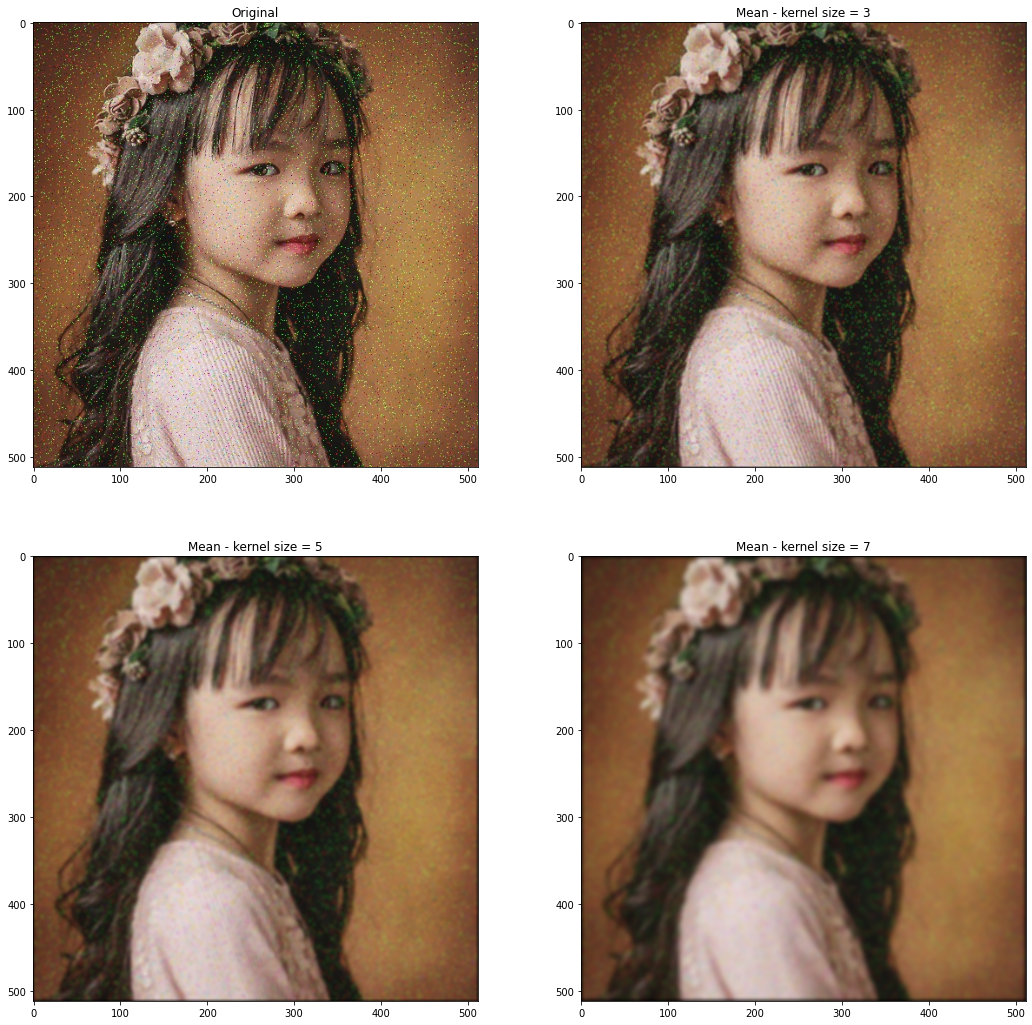

In [7]:
girl = cv2.imread("img/girl.jpg", cv2.IMREAD_UNCHANGED)
lena = cv2.imread('img/lena.jpg',cv2.IMREAD_GRAYSCALE) 
#Storing the image 
cv2.imwrite('img/lena_noise.jpg', add_noise(lena))
lena_noise = cv2.imread("img/lena_noise.jpg", cv2.IMREAD_UNCHANGED)

smoothingByMean(girl)



Bộ lọc Gaussian

In [8]:
# Xây dựng bộ lọc Gaussian
def createGaussianKernel(kernel_size, sigma):
    h = kernel_size//2

    kernel = np.zeros((kernel_size, kernel_size), np.float64)
    for i in range(kernel_size):
        for j in range(kernel_size):
            kernel[i,j] = np.exp(-(np.square(i-h) + np.square(j-h))/(2*np.square(sigma)))
            kernel[i,j] *= 1/(sigma*np.sqrt(2*np.pi))
    return kernel

def GaussianFilter(image, kernel_size, sigma):
    kernel = createGaussianKernel(kernel_size, sigma)
    output = convolute(image, kernel)
    return output

In [9]:
def smoothingByGaussian(image):
    kernel_size = np.array([3, 5, 7, 9])

    isGray = len(image.shape) == 2
    if isGray == True:
        plt.figure(figsize=(15, 15))
        plt.subplot(221), plt.title('Original'), plt.imshow(image, cmap="gray")
        for i in range(1, len(kernel_size)):
            image_denoise = GaussianFilter(image, kernel_size[i-1], 0.95) # sigma = 0.95
            cv2.imwrite('gaussian_denoise%d.jpg'%kernel_size[i-1], image_denoise)
            plt.subplot(2, 2, i+1), plt.title('Gaussian - kernel size = %d' %kernel_size[i-1])
            plt.imshow(image_denoise, cmap="gray")
        plt.show()
    else:
        image_denoise = image
        plt.figure(figsize=(18, 18))
        plt.subplot(221), plt.title('Original'), plt.imshow(image[:,:,::-1])
        for i in range(1, len(kernel_size)):
            for j in range(3):
                image_denoise[:,:,j] = GaussianFilter(image[:,:,j], kernel_size[i-1], 0.95)
            cv2.imwrite('gaussian_denoise%d.jpg'%kernel_size[i-1], image_denoise)
            plt.subplot(2, 2, i+1), plt.title('Gaussian - kernel size = %d' %kernel_size[i-1])
            plt.imshow(image_denoise[:,:,::-1])
        plt.show()

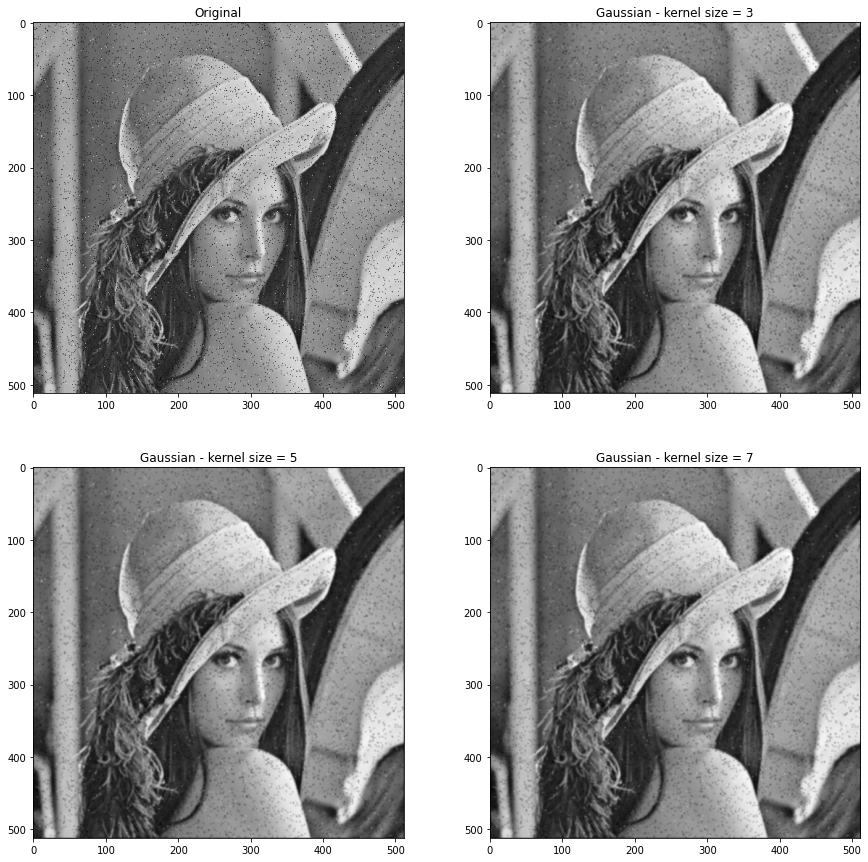

In [10]:
girl = cv2.imread("img/girl.jpg", cv2.IMREAD_UNCHANGED)
lena = cv2.imread('img/lena.jpg',cv2.IMREAD_GRAYSCALE) 
#Storing the image 
cv2.imwrite('img/lena_noise.jpg', add_noise(lena))
lena_noise = cv2.imread("img/lena_noise.jpg", cv2.IMREAD_UNCHANGED)

smoothingByGaussian(lena_noise)

Toán tử trung vị
- Là phép lọc phi tuyến, hiệu quả với lọc nhiễu đốm, nhiễu muối tiêu

In [11]:
# Xây dựng bộ lọc trung vị theo phương pháp: zero padding
def medianFilter(image, kernel_size):
    h = kernel_size//2
    m, n = image.shape
    # Thêm padding cho ảnh đầu vào
    padded_image = np.zeros((m + 2*h, n + 2*h), int)

    padded_image[h:-h,h:-h] = image
    padded_image[:h, h:-h] = image[:h,:]
    padded_image[-h:,h:-h] = image[-h:,:]
    padded_image[h:-h,:h] = image[:,:h]
    padded_image[h:-h,-h:] = image[:,-h:]
    Kernel_len = kernel_size*kernel_size
    # Tạo ma trận đầu ra
    output = np.zeros((m,n),int)
    for i in range(m):
        for j in range(n):
            array = np.zeros(Kernel_len, int)
            for p in range(kernel_size):
                for q in range(kernel_size):
                    array[p*kernel_size+q] = padded_image[i+p, j+q]
                array = np.sort(array)
            output[i,j] = array[len(array)//2]
    return output

In [12]:
def smoothingByMedian(image):
    kernel_size = np.array([3, 5, 7, 9])

    isGray = len(image.shape) == 2
    if isGray == True:
        plt.figure(figsize=(15, 15))
        plt.subplot(221), plt.title('Original'), plt.imshow(image, cmap="gray")
        for i in range(1, len(kernel_size)):
            image_denoise = medianFilter(image, kernel_size[i-1]) 
            cv2.imwrite('median_denoise%d.jpg'%kernel_size[i-1], image_denoise)
            plt.subplot(2, 2, i+1), plt.title('Median - kernel size = %d' %kernel_size[i-1])
            plt.imshow(image_denoise, cmap="gray")
        plt.show()
    else:
        image_denoise = image
        plt.figure(figsize=(18, 18))
        plt.subplot(221), plt.title('Original'), plt.imshow(image[:,:,::-1])
        for i in range(1, len(kernel_size)):
            for j in range(3):
                image_denoise[:,:,j] = medianFilter(image[:,:,j], kernel_size[i-1])
            cv2.imwrite('median_denoise%d.jpg'%kernel_size[i-1], image_denoise)
            plt.subplot(2, 2, i+1), plt.title('Median - kernel size = %d' %kernel_size[i-1])
            plt.imshow(image_denoise[:,:,::-1])
        plt.show()

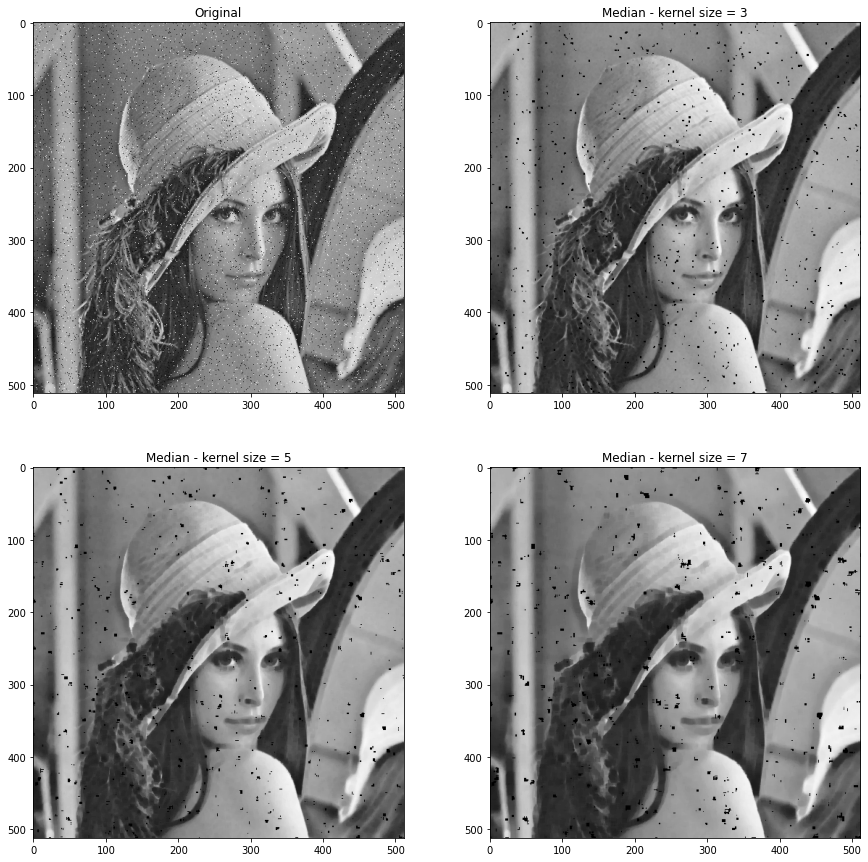

In [13]:
girl = cv2.imread("img/girl.jpg", cv2.IMREAD_UNCHANGED)
lena = cv2.imread('img/lena.jpg',cv2.IMREAD_GRAYSCALE) 
#Storing the image 
cv2.imwrite('img/lena_noise.jpg', add_noise(lena))
lena_noise = cv2.imread("img/lena_noise.jpg", cv2.IMREAD_UNCHANGED)

smoothingByMedian(lena_noise)

##### IV. Phát hiện biên cạnh dựa trên miền không gian
###### 1. Toán tử Gradient
###### 2. Toán tử Laplace
###### 3. Toán tử Laplace of Gaussian
###### 4. Phương pháp Canny

1. Toán tử Gradient

In [57]:
# Toán tử Sobel 
def SobelFilter(image, gauss_ksize = 5, dx = 1, dy = 1, threshold = 60):
    image = cv2.GaussianBlur(image,(gauss_ksize,gauss_ksize),0)

    X = np.array([[1,0,-1], [2,0,-2], [1,0,-1]]) # bộ lọc làm nổi biên theo phương ngang
    Y = np.array([[1,2,1], [0,0,0], [-1,-2,-1]]) # bộ lọc làm nổi biên theo phương thẳng đứng

    sobel_x = convolute(image, X)
    sobel_y = convolute(image, Y)

    if dx==1 and dy==0:
        return sobel_x
    if dx==0 and dy==1:
        return sobel_y
    sobel = np.sqrt(np.square(sobel_x) + np.square(sobel_y))
    # sobel = (sobel_x + sobel_y)/2
    img_sobel = np.uint8(sobel)
    for i in range(img_sobel.shape[0]):
        for j in range(img_sobel.shape[1]):
            if img_sobel[i][j] < threshold:
                img_sobel[i][j] = 0
    return img_sobel

(<AxesSubplot:title={'center':'Sobel'}>,
 Text(0.5, 1.0, 'Sobel'),
 <matplotlib.image.AxesImage at 0x263ba85cee0>)

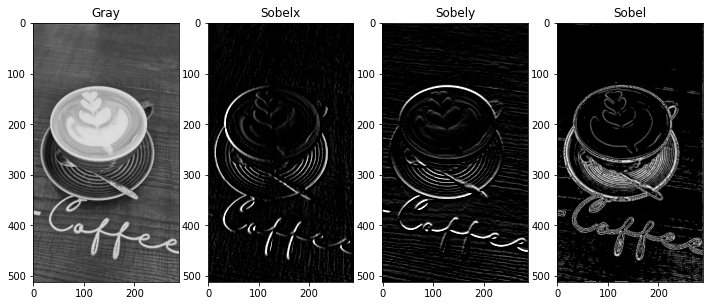

In [58]:
img = cv2.imread('img/cafe.jpg', cv2.IMREAD_GRAYSCALE)
img_x = SobelFilter(img, dx=1, dy=0)
img_y = SobelFilter(img, dx=0, dy=1)
img_xy = SobelFilter(img, dx=1, dy=1)
plt.figure(figsize=(12,12))
plt.subplot(141), plt.title("Gray"), plt.imshow(img, cmap='gray', vmin=0,vmax=255)
plt.subplot(142), plt.title("Sobelx"), plt.imshow(img_x, cmap='gray', vmin=0,vmax=255)
plt.subplot(143), plt.title("Sobely"), plt.imshow(img_y, cmap='gray', vmin=0,vmax=255)
plt.subplot(144), plt.title("Sobel"), plt.imshow(img_xy, cmap='gray', vmin=0,vmax=255)

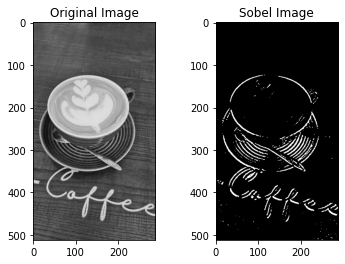

In [103]:
def Sobel_Using_Libary(img, blur_ksize=5, sobel_ksize=3, skipping_threshold=5):
    img_gaussian = cv2.GaussianBlur(img,(blur_ksize,blur_ksize),0)
        
    #sobel
    img_sobelx = cv2.Sobel(img_gaussian,cv2.CV_64F,1,0,ksize=sobel_ksize)

    img_sobely = cv2.Sobel(img_gaussian,cv2.CV_64F,0,1,ksize=sobel_ksize)

    img_sobel_xy = cv2.Sobel(img_gaussian,cv2.CV_64F,1,1,ksize=sobel_ksize)
    
    for i in range(img_sobel_xy.shape[0]):
        for j in range(img_sobel_xy.shape[1]):
            if img_sobel_xy[i][j] < skipping_threshold:
                img_sobel_xy[i][j] = 0
            else:
                img_sobel_xy[i][j] = 255
    return img_sobel_xy

img = cv2.imread('img/cafe.jpg', cv2.IMREAD_GRAYSCALE)
img_sobel = Sobel_Using_Libary(img, 5, 3, 13)
plt.subplot(121), plt.title('Original Image'), plt.imshow(img, cmap = 'gray', vmin = 0, vmax= 255)
plt.subplot(122), plt.title('Sobel Image'), plt.imshow(img_sobel,cmap = 'gray', vmin = 0, vmax = 255)
plt.show()